<a href="https://colab.research.google.com/github/srizvi29/Sara_Rizvi_ML_repo/blob/main/HWK3_Rizvi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name: Sara Rizvi**

**RIN: 662088215**

**Homework 2**

In [ ]:
!pip install -U scikit-learn

import sklearn
print("Scikit-learn version:", sklearn.__version__)

Scikit-learn version: 1.6.1


In [22]:
# Import basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Question 1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Machine Learning


<ipython-input-23-a01a81173967>:16: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(image)
<ipython-input-23-a01a81173967>:17: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


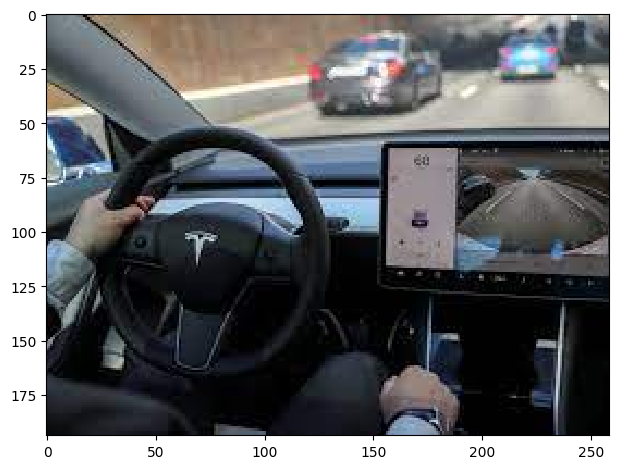

In [23]:
# Download image using skimage module
from google.colab import drive
from google.colab import files

# Mount Google Drive
drive.mount('/content/drive')
# Go to the current folder
%cd /content/drive/MyDrive/Machine Learning

from skimage import io

# Read an image
image = io.imread('seg2.jpg')

# Display image
io.imshow(image)
io.show()

In [24]:
# Reshape image to a 2D array of pixels
pixels = image.reshape((-1,3))

In [26]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(pixels)  # Train the model to fit the image array

# Calculate the silhouette score
score = silhouette_score(pixels, kmeans.labels_)

print("Silhouette Score:", score)

Silhouette Score: 0.5305152927308904


In [103]:
print(image.shape) # 3 color channel image - has (192*259*3 = 150486) elements
print(pixels.shape) # 2D array

(194, 259, 3)
(50246, 3)


In [104]:
import random
random.seed(123)
np.random.seed(123)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5)
kmeans.fit(pixels) # Train the model to fit the image array

# Segmented pixels
seg_pixels = kmeans.labels_
seg_pixels.shape

(50246,)

In [105]:
# Reshape back into original image shape
seg_image = seg_pixels.reshape(image.shape[:2]) # Use only 1st two elements of image
seg_image.shape

(194, 259)

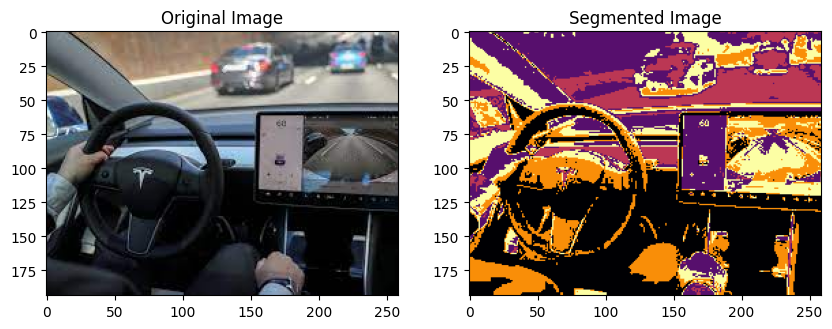

In [106]:
plt.figure(figsize=(10,10))
# Plot the original image
plt.subplot(1,2,1)
plt.imshow(image)
plt.title('Original Image')

# Plot the segmented image - highlights different parts of the car
plt.subplot(1,2,2)
plt.imshow(seg_image, cmap='inferno')
plt.title('Segmented Image')
plt.show()

# Question 2

In [1]:
# Download image using skimage module
from google.colab import drive
from google.colab import files

# Mount Google Drive
drive.mount('/content/drive')
# Go to the current folder
%cd /content/drive/MyDrive/Machine Learning

%matplotlib inline

# Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

# Text file
datafile = 'housing_prices.txt'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Machine Learning


In [2]:
# Import file through pandas
data = pd.read_csv('housing_prices.txt') # Read in file using pandas dataframe
# Create Pandas dataframe with labels
data.columns = ['Population','Price']
print(data.head())

   Population    Price
0      5.5277   9.1302
1      8.5186  13.6620
2      7.0032  11.8540
3      5.8598   6.8233
4      8.3829  11.8860


In [3]:
# Extract features and targets
X = data[['Population']].values # Feature (Population)
y = data[['Price']].values # Target (Prices)

In [4]:
# Normalize data
X = (X-np.mean(X))/np.std(X)
y = (y-np.mean(y))/np.std(y)

In [5]:
# Linear regression model to predict house prices based on population
# Formula: Price = theta_0 + theta_1 * Population (where theta_0=bias, theta_1=coeff. for pop feature )
theta = np.random.randn(2,1) # Initialize theta (represents the model's parameters learned during training)

In [6]:
# Define cost function
def cost_func(X,y,theta):
  m = len(y)
  predictions = X @ theta
  return (1/(2*m)) * np.sum((predictions-y)**2)

In [7]:
def mini_batch_gradient_descent(X,y,theta,learning_rate, batch_size, epochs):
  m = len(y)
  X = np.c_[np.ones((m,1)),X]
  cost_history = [] # store cost history
  w_store = [] # store weights value

  for epoch in range(epochs):
    indices = np.random.permutation(m)
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    for i in range(0,m,batch_size):
      X_batch = X_shuffled[i:i+batch_size]
      y_batch = y_shuffled[i:i+batch_size]

      gradients = (1/len(y_batch)) * X_batch.T @ (X_batch @ theta - y_batch)
      #gradients = gradients.mean(axis=1, keepdims=True)
      theta -= learning_rate * gradients

    # Append to cost list
    cost = cost_func(X,y,theta)
    cost_history.append(cost)

    # Append to weights list
    w_store.append(theta.flatten()) # converts to 1D list
  return theta, cost_history, w_store

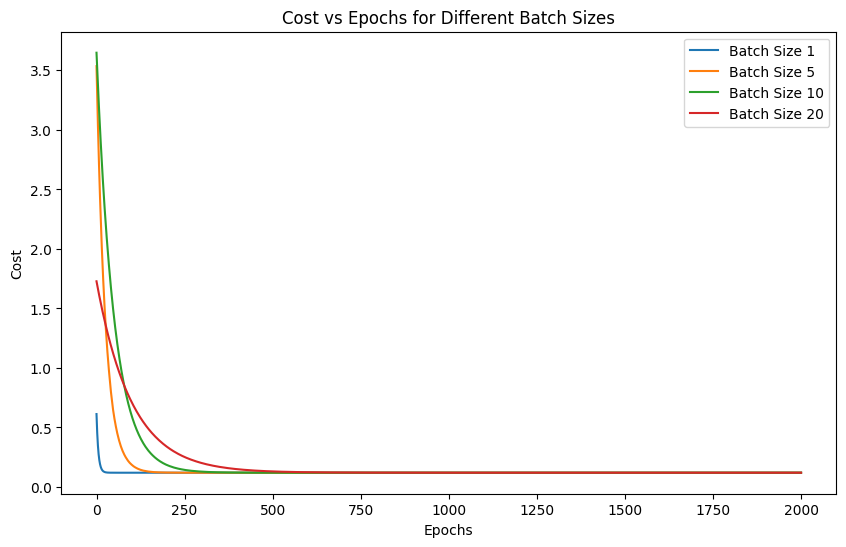

In [21]:
# Set so that same random numbers each time
import random
random.seed(123)
np.random.seed(123)

# Various batch sizes
batch_sizes = [1,5,10,20]
learning_rate = 0.001
epochs = 2000

plt.figure(figsize=(10,6))

# Loop through the batch sizes
for batch_size in batch_sizes:
  theta = np.random.randn(2,1)
  theta, cost_history, w_store = mini_batch_gradient_descent(X,y,theta,learning_rate,batch_size,epochs)
  # Plot batch size
  plt.plot(cost_history, label=f'Batch Size {batch_size}')

plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost vs Epochs for Different Batch Sizes')
plt.legend()
plt.show()

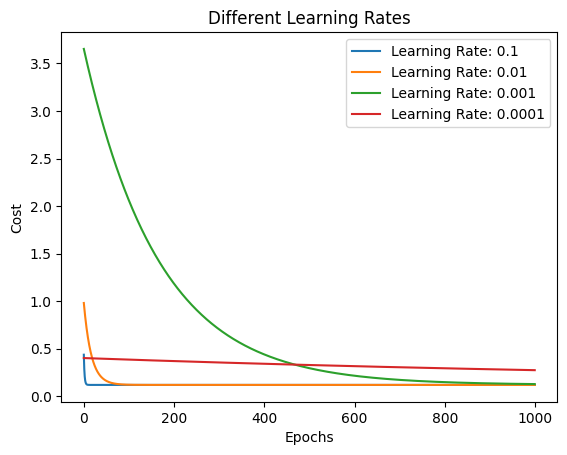

In [9]:
# Used to check optimal learning rate
import random
random.seed(123)
np.random.seed(123)

# Test out range of learning rates
import matplotlib.pyplot as plt

# Set variables
learning_rates = [0.1, 0.01, 0.001, 0.0001]
epochs = 1000
batch_size = 32

# Loop through each learning rate
for lr in learning_rates:
    initial_theta = np.random.randn(2, 1)  # Random initial theta
    theta_final, cost_history, _ = mini_batch_gradient_descent(X, y, initial_theta, lr, batch_size, epochs)
    # Plot
    plt.plot(cost_history, label=f'Learning Rate: {lr}')

plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Different Learning Rates')
plt.legend()
plt.show()


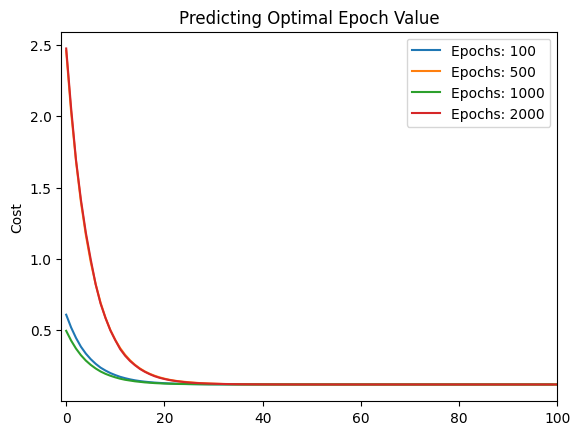

In [10]:
# Used to check optimal epoch
import random
random.seed(123)
np.random.seed(123)

# Test out range of epochs
epoch_values = [100, 500, 1000, 2000]

# Loop through list epochs
for epoch in epoch_values:
    initial_theta = np.random.randn(2, 1)  # Random initial theta
    theta_final, cost_history, _ = mini_batch_gradient_descent(X, y, initial_theta, learning_rate=0.01, batch_size=10, epochs=epoch)
    # Plot
    plt.plot(cost_history, label=f'Epochs: {epoch}')

plt.xlim(-1,100)
plt.ylabel('Cost')
plt.title('Predicting Optimal Epoch Value')
plt.legend()
plt.show()


In [11]:
# Plotting 3D surface plot
# Create mesh grid for theta_0 and theta_1
theta_0_vals = np.linspace(-10,10,100) # Range for theta_0
theta_1_vals = np.linspace(-10,10,100) # Range for theta_1
theta_0_mesh, theta_1_mesh = np.meshgrid(theta_0_vals, theta_1_vals) # Applies meshgrid

In [12]:
# Initialize cost array
cost_values = np.zeros_like(theta_0_mesh) # Create array of zeros using bias term

# Add bias term for calculation
X_b = np.c_[np.ones((X.shape[0], 1)), X]

In [13]:
# Loop over theta_0 and theta_1
for i in range(len(theta_0_vals)):
  for j in range(len(theta_1_vals)):
    theta = np.array([[theta_0_mesh[i, j]], [theta_1_mesh[i, j]]])
    cost_values[i,j] = cost_func(X_b, y, theta) # calculate cost of current iteration using bias term

In [14]:
# Perform gradient descent
# Set so that same random numbers each time
import random
random.seed(123)
np.random.seed(123)

# Various batch sizes
batch_sizes = [1,5,10,20]
initial_theta_val = np.random.randn(2,1)
learning_rate = 0.01
epochs = 1000

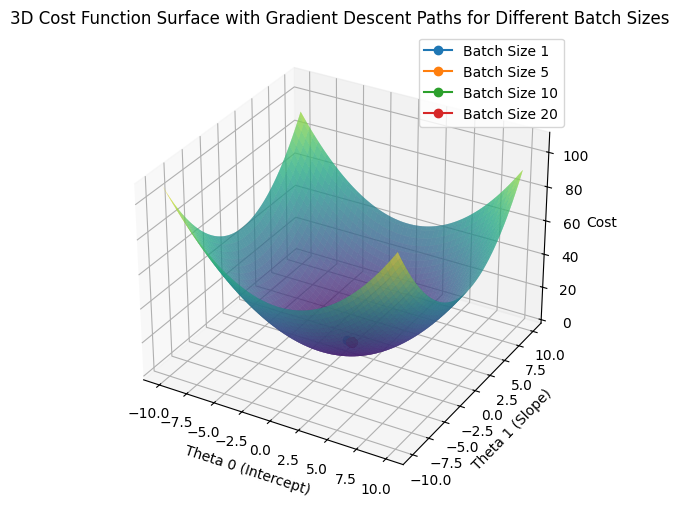

In [15]:
# Create 3D plot
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111,projection='3d')

# Loop over different batch sizes
for batch_size in batch_sizes:
  # Perform gradient descent for each batch size
  theta, cost_history, w_store = mini_batch_gradient_descent(X,y,initial_theta_val,learning_rate, batch_size, epochs)

  # Plot surface for current theta value
  ax.plot_surface(theta_0_mesh, theta_1_mesh, cost_values,cmap='viridis', alpha=0.3)
  # Plot gradient descent path for each batch size
  w_store = np.array(w_store) # Convert weights to numpy array for easy indexing
  J_values = cost_history # Cost function values
  # Plot current batch_size
  ax.plot([x[0] for x in w_store], [x[1] for x in w_store], J_values, marker='o', label=f'Batch Size {batch_size}')

# Labels
ax.set_xlabel('Theta 0 (Intercept)')
ax.set_ylabel('Theta 1 (Slope)')
ax.set_zlabel('Cost')
ax.set_title('3D Cost Function Surface with Gradient Descent Paths for Different Batch Sizes')

ax.legend()
plt.show()
ax.set_xlabel('Theta 0 (Intercept)')
ax.set_ylabel('Theta 1 (Slope)')
ax.set_zlabel('Cost')
ax.set_title('3D Cost Function Surface with Gradient Descent Paths for Different Batch Sizes')

ax.legend()
plt.show()

**What happens when you use batch size equal to one?**

When batch size equal 1, then the cost function has little variability and stays mostly at 0.

# Question 3

In [ ]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [ ]:
# Wisconsin Breast Cancer dataset
from sklearn.datasets import load_breast_cancer
bc_data = load_breast_cancer() # load the data set

In [ ]:
# Divde into features and target
X = bc_data['data'] # Features
y = bc_data['target'] # Target (0 or 1)

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    train_size = 0.70,
                                                    test_size=0.30,
                                                    random_state=42)

In [ ]:
# Apply Logisitic regression
lr = LogisticRegression(solver='lbfgs', max_iter=1000)
# Apply Recursive Feature Elimination (rfe)
rfe = RFE(estimator=lr, n_features_to_select=2) # Use rfe to find the best 2 features
# Fit this model
rfe.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=2)

In [ ]:
print('True/False Selection of Features:', rfe.support_)

True/False Selection of Features: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True  True False False]


In [ ]:
feature_indices = np.arange(1,31) # create numpy array with smae number of elements (30)
feature_indices = feature_indices[rfe.support_] # selects only keeps the important features
print(feature_indices) # Represents the indices (location of feature in line) of the features that were selected as most important by rfe

[27 28]


The best features are ['worst concavity' 'worst concave points']


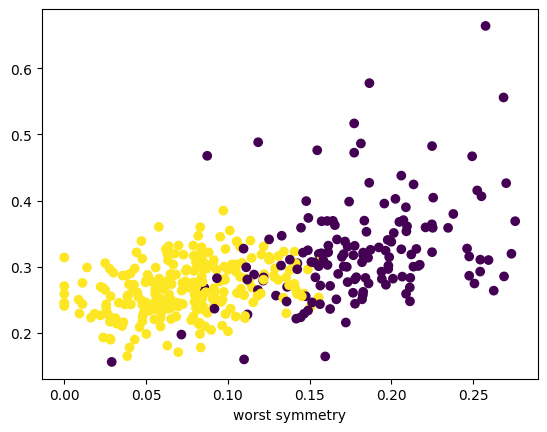

In [ ]:
# Plot
plt.scatter(X_train[:, feature_indices[0]], X_train[:,feature_indices[1]], c=y_train)
plt.xlabel(bc_data.feature_names[feature_indices[0]])
plt.xlabel(bc_data.feature_names[feature_indices[1]])

best = np.array(bc_data.feature_names)[rfe.support_]
print("The best features are", best)

In [ ]:
from sklearn.metrics import classification_report

# Calculate avg precision, recall, f1 score, and accuracy of knn model
print(classification_report(y_test, rfe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79        63
           1       0.84      0.95      0.90       108

    accuracy                           0.86       171
   macro avg       0.87      0.83      0.84       171
weighted avg       0.86      0.86      0.86       171



# Question 4

In [28]:
# Dataloader code
from google.colab import drive
from google.colab import files

# Mount Google Drive
drive.mount('/content/drive')
# Go to the current folder
%cd /content/drive/MyDrive/Machine Learning


%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

# Text file
datafile = 'housing_prices.txt'
# Arranging data
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1),unpack=True)
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size
X = np.insert(X,0,1,axis=1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Machine Learning


In [29]:
# Import file using pandas
data = pd.read_csv('housing_prices.txt', header=None)
# Create Pandas dataframe with labels
data.columns = ['Population','Price']
print(data.head())


   Population    Price
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233


In [30]:
X = data[['Population']].values
y = data['Price'].values

In [31]:
X.shape

(97, 1)

In [32]:
y.shape

(97,)

In [33]:
# Import tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense # for hidden layers
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [34]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.30,
                                                    train_size=0.70,
                                                    random_state=42)

In [35]:
# Normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)

X_train shape: (67, 1)
X_test shape: (30, 1)
y_train shape: (67,)
y_test shape: (30,)


In [37]:
X_test

array([[ 3.4537422 ],
       [-0.76795079],
       [-0.79494796],
       [-0.49593099],
       [-0.82606786],
       [ 0.39220952],
       [ 2.83666395],
       [ 0.90802843],
       [-0.68714546],
       [-0.58091224],
       [-0.45342707],
       [-0.46446532],
       [-0.66302089],
       [ 1.20592827],
       [-0.1248595 ],
       [-0.64748754],
       [-0.74582109],
       [-0.68094807],
       [-0.86037954],
       [-0.28412952],
       [-0.73212301],
       [ 0.48990471],
       [-0.74334745],
       [-0.77526529],
       [-0.51619882],
       [-0.63897611],
       [-0.86165625],
       [-0.68222479],
       [ 1.56128023],
       [-0.28617758]])

In [38]:
# Attempt 2
# Initialize model
model = Sequential()
# Add layer(s)
model.add(Dense(2, activation='relu', input_shape=(X_train.shape[1],))) # creates single layer w/ 2 neurons, ReLU activation
#model.add(Dense(2, activation='relu', input_shape=(1,)))
model.add(Dense(1)) # creates single layer w/ 2 neurons, ReLU activation

# Optimize model using stochastic descent gradient
opt = optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=opt, loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
# Fit data to model
history = model.fit(X_train,y_train, epochs=500, batch_size=32, validation_data=(X_test,y_test))

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - loss: 55.1356 - val_loss: 41.4573
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 39.2342 - val_loss: 23.4527
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 23.2223 - val_loss: 16.7818
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 13.5568 - val_loss: 14.1694
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 11.4324 - val_loss: 12.7290
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 9.4547 - val_loss: 12.0535
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 7.3077 - val_loss: 12.0477
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 9.3898 - val_loss: 10.8700
Epoch 9/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 8.7004 - val_loss: 11.1140
Epoch 10/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 8.3495 - val_loss: 11.6263
Epoch 11/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 8.9055 - val_loss: 11.6235
Epoch 12/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss

In [40]:
# Evaluate the model and get the loss
test_loss = model.evaluate(X_test, y_test)

# Print the test loss (since accuracy is not relevant for regression)
print('Test Loss:', test_loss)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 11.6254
Test Loss: 11.625415802001953


In [41]:
# Predict price for a house in a city w/ population of 165,000 w/ model
predict_population = np.array([[165000]])
#preds = model.predict(X_test)
price_prediction = model.predict(predict_population)
print(f'Predicted Price: {price_prediction[0][0]}')


# Mean Squared Error regression metric
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Predicted Price: 821273.0625
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Mean Squared Error: 11.625416957540152


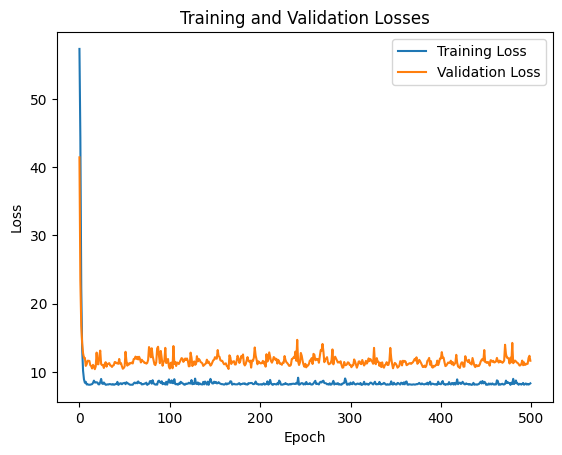

In [42]:
# Plot training and validation losses
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Explain trends found in plots for training and validation losses**

As can be seen in the graph above, both the training loss and validation loss have noise. However, the validation loss has greater noise. Both follow a similar pattern, but the validation loss is greater.